### Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
display(data.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
display(data.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.shape

(150, 4)

In [6]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(1)

In [8]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

### Visualization

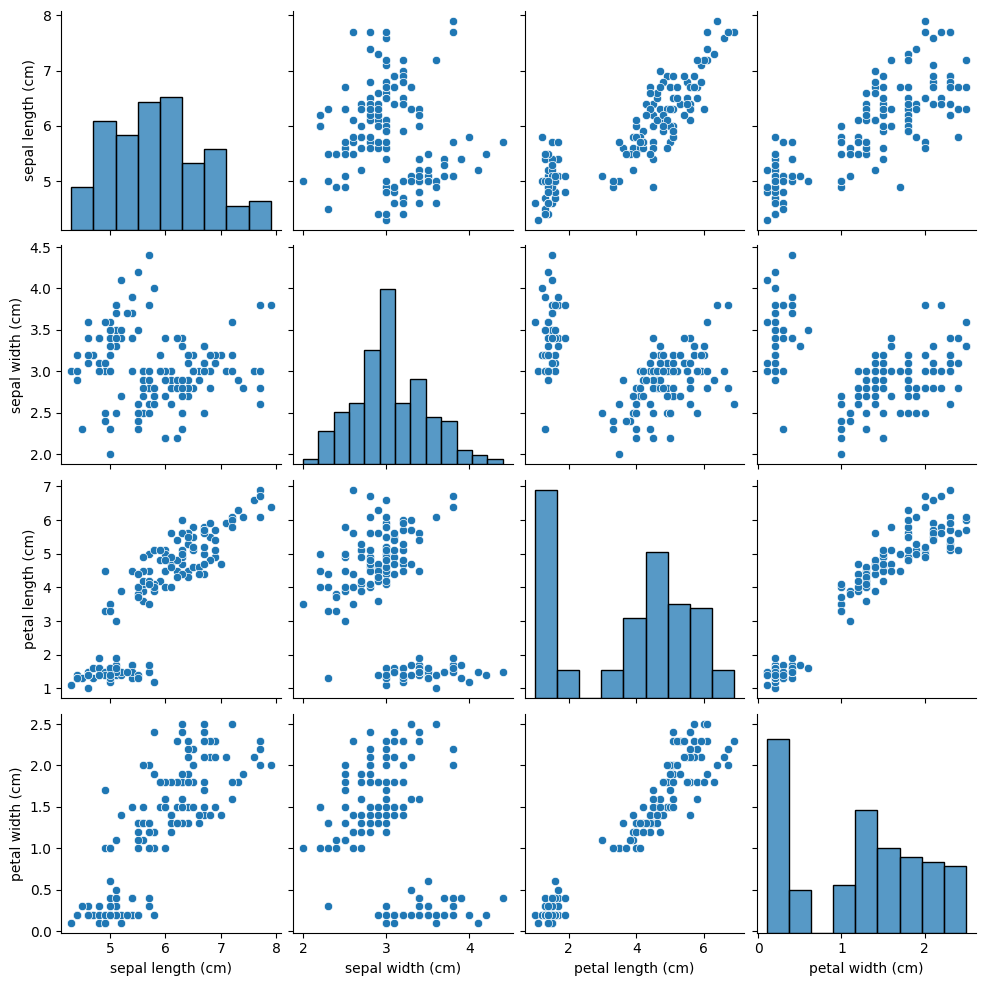

In [9]:
sns.pairplot(data)

### Normalization

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


### K-Means

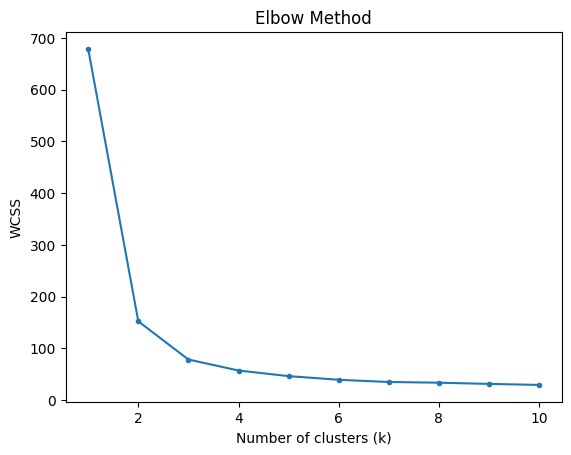

In [11]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(data)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='.')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

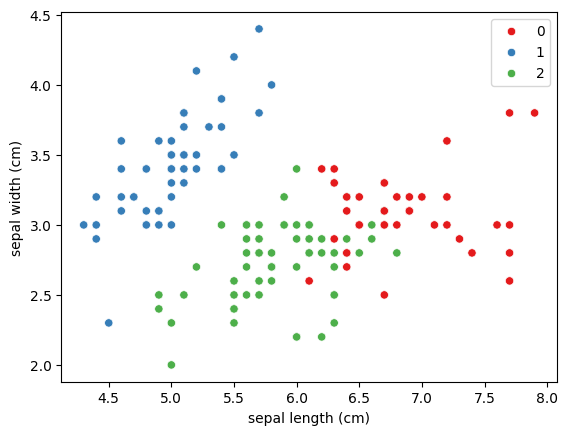

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(data)
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels_km, palette='Set1')

### DBSCAN


In [13]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels_db = dbscan.fit_predict(data)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

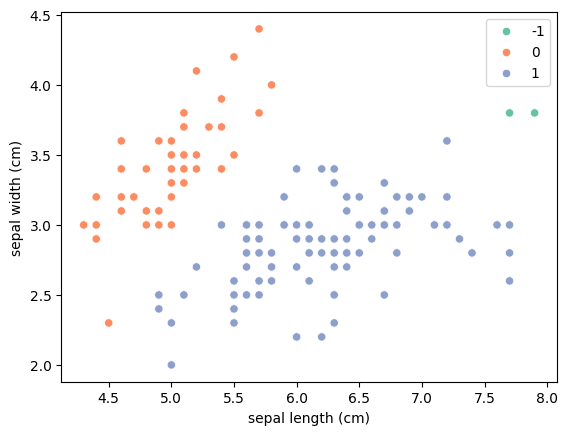

In [14]:
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels_db, palette='Set2')

### Evaluation

In [15]:
print("Silhouette Scores :")
print(f"K-Means: {silhouette_score(data, labels_km):.3f}")
print(f"DBSCAN: {silhouette_score(data, labels_db):.3f}" if len(set(labels_db)) > 1 else "DBSCAN:not avaliable ")

Silhouette Scores :
K-Means: 0.554
DBSCAN: 0.511
